In [1]:
print("hello comrade")

hello comrade


In [11]:
import fitparse
import datetime

In [19]:
fitfile = fitparse.FitFile("/Users/pwsmithy/Desktop/5826891717_ACTIVITY.fit")

# Iterate over all messages of type "record"
# (other types include "device_info", "file_creator", "event", etc)

time = list()
heart_rate = list()
speed = list()

for record in fitfile.get_messages("record"):

    # Records can contain multiple pieces of data (ex: timestamp, latitude, longitude, etc)
    for data in record:
        if data.name == "timestamp":
          
            time.append((data.value-datetime.datetime(1970,1,1)).total_seconds())
            
        if data.name == "heart_rate":
            heart_rate.append(data.value)
        if data.name == "speed":
            speed.append(data.value)
        # Print the name and value of the data (and the units if it has any)
        if data.units:
            print(" * {}: {} ({})".format(data.name, data.value, data.units))
        else:
            print(" * {}: {}".format(data.name, data.value))

    print("---")

 * altitude: -18.0 (m)
 * cadence: 0 (rpm)
 * distance: 0.0 (m)
 * enhanced_altitude: -18.0 (m)
 * enhanced_speed: 0.0 (m/s)
 * fractional_cadence: 0.0 (rpm)
 * heart_rate: 73 (bpm)
 * speed: 0.0 (m/s)
 * timestamp: 2020-11-14 14:44:26
 * unknown_87: 0
 * unknown_88: 300
---
 * altitude: -18.0 (m)
 * cadence: 0 (rpm)
 * distance: 0.0 (m)
 * enhanced_altitude: -18.0 (m)
 * enhanced_speed: 0.0 (m/s)
 * fractional_cadence: 0.0 (rpm)
 * heart_rate: 72 (bpm)
 * speed: 0.0 (m/s)
 * timestamp: 2020-11-14 14:44:27
 * unknown_87: 0
 * unknown_88: 300
---
 * altitude: -18.19999999999999 (m)
 * cadence: 80 (rpm)
 * distance: 0.0 (m)
 * enhanced_altitude: -18.19999999999999 (m)
 * enhanced_speed: 0.0 (m/s)
 * fractional_cadence: 0.0 (rpm)
 * heart_rate: 75 (bpm)
 * speed: 0.0 (m/s)
 * timestamp: 2020-11-14 14:44:33
 * unknown_87: 0
 * unknown_88: 300
---
 * altitude: -18.19999999999999 (m)
 * cadence: 81 (rpm)
 * distance: 7.41 (m)
 * enhanced_altitude: -18.19999999999999 (m)
 * enhanced_speed: 3.

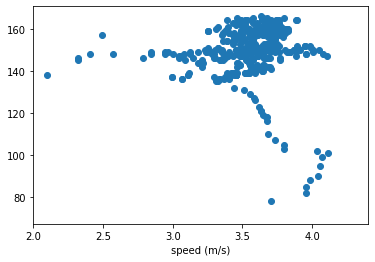

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(speed, heart_rate)
plt.xlabel("speed (m/s)")
plt.xlim((2, 4.4))
plt.show()